## FDNote1W.ipynb
Prepared by Inmoo Lee for the Financial Databases class at KAIST
inmool@kaist.ac.kr

List of input files

    - note1.txt
    - note1test.xlsx
    - note1data.xlsx
    - note1.RData

List of output files

    - note1_out.xlsx
    - note1.pkl
    - note1.ft
    

### Package 

To use packages, you need to install them first.

Reference the following for the installation of pakcages 
https://www.youtube.com/watch?v=Z_Kxg-EYvxM 

When you have problems with installing packages using conda, reference the following

https://docs.conda.io/projects/conda/en/latest/user-guide/configuration/use-condarc.html

## Set the working environment

If a pakcage is not installed, then you have to install it first using "!pip install ***" or "conda install ***" in Ananconda Powershell Prompt

In [1]:
import os #import a package called os

print(os.getcwd())  #get the current working directory

c:\Users\chlje\VSCodeProjects\KAIST_MFE\BAF507금융DB\1주차


In [2]:
# path="d:\\****\\"# specify the path to change to in your computer
# os.chdir(path) # change the working directory

from pathlib import Path

CWD_PATH = Path.cwd()

## Data input/import

##### Some basic commands


In [3]:
counter=100 #define the value of a variable
miles=1000.0
name="John"

print (counter) #print out to the output screen
print(miles)
print(name)

100
1000.0
John


In [4]:
# Check the type of the variables
print(type(counter))
print(type(miles))
print(type(name))

<class 'int'>
<class 'float'>
<class 'str'>


In [5]:
list = [ 'abcd', 786 , 2.23, 'john', 70.2 ] #series
tinylist = [123, 'john']

print(list) # Prints complete list
print(tinylist) #Prints list two times

print(list[1]) #Prints first element of the list
print(list[1:4]) #Prints elements starting from 2nd till 3rd
print(list[2:]) #Prints elements starting from 3rd element
print(tinylist*2) #Prints list two times
print(list + tinylist) #Prints concatenated lists

['abcd', 786, 2.23, 'john', 70.2]
[123, 'john']
786
[786, 2.23, 'john']
[2.23, 'john', 70.2]
[123, 'john', 123, 'john']
['abcd', 786, 2.23, 'john', 70.2, 123, 'john']


In [6]:
# Check the type of the list variables
print(type(tinylist))

<class 'list'>


### Dictionary

Composed of keys and values

In [7]:
dict = {} # Create an empty dictionary
dict['one'] = "This is one"
dict[2]     = "This is two"

tinydict = {'name': 'john','code':6734, 'dept': 'sales'}


print (dict['one'])       # Prints value for 'one' key
print (dict[2])           # Prints value for 2 key
print (tinydict)          # Prints complete dictionary
print (tinydict.keys())   # Prints all the keys
print (tinydict.values()) # Prints all the values
print(dict.keys())
print(dict.values())

This is one
This is two
{'name': 'john', 'code': 6734, 'dept': 'sales'}
dict_keys(['name', 'code', 'dept'])
dict_values(['john', 6734, 'sales'])
dict_keys(['one', 2])
dict_values(['This is one', 'This is two'])


In [8]:
# Check the type of the dictionary variables
print(type(dict))
print(type(tinydict))

<class 'dict'>
<class 'dict'>


## Create and read data

####  Method 1: Create one directly

First, import packages after installing packages (if not installed yet, you can install inside jupyternote by using the following command

!pip install numpy

)

Combine arrays and create a Pandas dataframe

In [9]:
import numpy as np
import pandas as pd

In [10]:
d=np.array((1,2,3,4,5))
print(d)
e=np.array(("M", "F", "F", "M", "F"))
f=np.array((68.5, 50.2, 45.5, 80.5, 55.0))
g=np.array((175, 150, 155, 165, 160))
print(np.column_stack((d,e,f,g)))

test1=pd.DataFrame(data=np.column_stack((d,e,f,g)),columns=["ID", "GENDER", "WEIGHT", "HEIGHT"])
print(test1)

[1 2 3 4 5]
[['1' 'M' '68.5' '175']
 ['2' 'F' '50.2' '150']
 ['3' 'F' '45.5' '155']
 ['4' 'M' '80.5' '165']
 ['5' 'F' '55.0' '160']]
  ID GENDER WEIGHT HEIGHT
0  1      M   68.5    175
1  2      F   50.2    150
2  3      F   45.5    155
3  4      M   80.5    165
4  5      F   55.0    160


In [11]:
print(type(g))

<class 'numpy.ndarray'>


### Choose a particular column or row in a dataframe

**loc** gets rows (or columns) with particular labels from the index.
**iloc** gets rows (or columns) at particular positions in the index (so it only takes integers).

In [12]:
print(test1.columns)
print(test1.loc[0:0,:])
print(test1.iloc[0:1,:])
print(test1.iloc[:,0:2])
print(test1.loc[:,['ID','HEIGHT']])
print(test1.iloc[:,0:2])

Index(['ID', 'GENDER', 'WEIGHT', 'HEIGHT'], dtype='object')
  ID GENDER WEIGHT HEIGHT
0  1      M   68.5    175
  ID GENDER WEIGHT HEIGHT
0  1      M   68.5    175
  ID GENDER
0  1      M
1  2      F
2  3      F
3  4      M
4  5      F
  ID HEIGHT
0  1    175
1  2    150
2  3    155
3  4    165
4  5    160
  ID GENDER
0  1      M
1  2      F
2  3      F
3  4      M
4  5      F


###  Method 2: Read from a text file

In [13]:
test2=pd.read_csv("./note1.txt", sep=" ", header=None, names=["ID", "GENDER", "WEIGHT", "HEIGHT"])
print(test2)
type(test2) #print out the type of variable, series or file

#test2.index=["row1", "row2", "row3", "row4","row5"]#for the naming of rows

   ID GENDER  WEIGHT  HEIGHT
0   1      M    68.5     175
1   2      F    50.2     150
2   3      F    45.5     155
3   4      M    80.5     165
4   5      F    55.0     160


pandas.core.frame.DataFrame

###  Method 3: Read from an Excel file


In [14]:
test3=pd.read_excel('./note1test.xlsx', sheet_name="TEST3", header=0)
print(test3)
print(test3.columns)

   ID GENDER  WEIGHT  HEIGHT
0   1      M    68.5     175
1   2      F    50.2     150
2   3      F    45.5     155
3   4      M    80.5     165
4   5      F    55.0     160
Index(['ID', 'GENDER', 'WEIGHT', 'HEIGHT'], dtype='object')


### Save the data to a DataFrame file using pandas

Compare different formats: e.g., check the class note for comparisons of alternative file formats (CSV, Excel, JSON, HDF5, Feather, Parquet and Pickle)

In [15]:
# To save the dataframe to an pickle format file
test3.to_pickle("./note1.pkl") #To save in the pickle format

In [16]:
# To use different file formats such as feather or parquet, you need to install the respective libraries.
# !pip install pyarrow

In [17]:
#Alterantivealy, you can use feather
test3.to_feather("./note1.ft")


### How to retrieve the saved data?

In [18]:
## you can call the saved file in the following way
test41=pd.read_pickle("./note1.pkl")
test42=pd.read_feather('./note1.ft')
print(type(test41))
print(type(test42))

print(test3)
print(test41)
print(test42)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
   ID GENDER  WEIGHT  HEIGHT
0   1      M    68.5     175
1   2      F    50.2     150
2   3      F    45.5     155
3   4      M    80.5     165
4   5      F    55.0     160
   ID GENDER  WEIGHT  HEIGHT
0   1      M    68.5     175
1   2      F    50.2     150
2   3      F    45.5     155
3   4      M    80.5     165
4   5      F    55.0     160
   ID GENDER  WEIGHT  HEIGHT
0   1      M    68.5     175
1   2      F    50.2     150
2   3      F    45.5     155
3   4      M    80.5     165
4   5      F    55.0     160


### How to save to an Excel file?

In [19]:
#To save to a new excel file, you can use the following command

test3.to_excel('./note1_out.xlsx', sheet_name='TEST4', index=False) #do not include index in the excel

### Conduct a simple analysis#

#### Add a category variable

define "STATURE" based on the value of HEIGHT


In [20]:
print(test1.dtypes) # print the type of each columns
print(test2.columns) #print the columns of the dataframe
print(test2) #print the dataframe

# Add a new column 'STATURE' based on the condition of HEIGHT
# If HEIGHT is less than 160, then STATURE is 'Short', otherwise 'Tall
test2.loc[:,'STATURE']=np.where((pd.to_numeric(test1.loc[:,'HEIGHT']) < 160), 'Short', 'Tall')
#######################
print(test2) #Check the updated dataframe with the new column

ID        object
GENDER    object
WEIGHT    object
HEIGHT    object
dtype: object
Index(['ID', 'GENDER', 'WEIGHT', 'HEIGHT'], dtype='object')
   ID GENDER  WEIGHT  HEIGHT
0   1      M    68.5     175
1   2      F    50.2     150
2   3      F    45.5     155
3   4      M    80.5     165
4   5      F    55.0     160
   ID GENDER  WEIGHT  HEIGHT STATURE
0   1      M    68.5     175    Tall
1   2      F    50.2     150   Short
2   3      F    45.5     155   Short
3   4      M    80.5     165    Tall
4   5      F    55.0     160    Tall


### Alternatively, you can define a function to do the same

Define func() to catogorize and then use **apply** to apply the function to a column of a dataframe

In [21]:
#Define a function to categorize height
# If HEIGHT is less than 160, then STATURE is 'Short', otherwise 'Tall
def func(x):            #x is an input
    if int(x) < 160:    #int() convert x to integer value
        return 'Short'  #assign the value to the function and return it
    else:
        return 'Tall'

print(test1) #print the original dataframe
# Apply the function to the HEIGHT column and create a new column STATURE
test1.loc[:,'STATURE'] = test1.loc[:,'HEIGHT'].apply(func)
print(test1) #Check the updated dataframe with the new column

  ID GENDER WEIGHT HEIGHT
0  1      M   68.5    175
1  2      F   50.2    150
2  3      F   45.5    155
3  4      M   80.5    165
4  5      F   55.0    160
  ID GENDER WEIGHT HEIGHT STATURE
0  1      M   68.5    175    Tall
1  2      F   50.2    150   Short
2  3      F   45.5    155   Short
3  4      M   80.5    165    Tall
4  5      F   55.0    160    Tall


### How to sort the data by the values of a column or columns?

In [22]:
#Sort values by 'GENDER' in ascending order.
testout=test1.sort_values(["GENDER",'WEIGHT'],ascending=True)
print(testout)

  ID GENDER WEIGHT HEIGHT STATURE
2  3      F   45.5    155   Short
1  2      F   50.2    150   Short
4  5      F   55.0    160    Tall
0  1      M   68.5    175    Tall
3  4      M   80.5    165    Tall


### Calculate group means and standard deviations

In [23]:
#Convert an object type to a numeric value
print(testout.dtypes)
testout["WEIGHT"]=pd.to_numeric(testout['WEIGHT'])
testout["HEIGHT"]=pd.to_numeric(testout['HEIGHT'])
print(testout.dtypes)


ID         object
GENDER     object
WEIGHT     object
HEIGHT     object
STATURE    object
dtype: object
ID          object
GENDER      object
WEIGHT     float64
HEIGHT       int64
STATURE     object
dtype: object


In [24]:
# After defining a dataframe grouped by variables of your choide, 
# you can use the agg() function to calculate various statistics
# such as sum, mean, median, min, max, and std for the grouped data
grouped=testout.groupby(['GENDER'])[['WEIGHT','HEIGHT']]
print(grouped.agg(['sum','mean','median',\
                   'min','max','std']))

       WEIGHT                                         HEIGHT                \
          sum       mean median   min   max       std    sum   mean median   
GENDER                                                                       
F       150.7  50.233333   50.2  45.5  55.0  4.750088    465  155.0  155.0   
M       149.0  74.500000   74.5  68.5  80.5  8.485281    340  170.0  170.0   

                            
        min  max       std  
GENDER                      
F       150  160  5.000000  
M       165  175  7.071068  


In [25]:
# Alternatively, you can use the following commands to get the statistics
# for each group
print(testout.groupby(["GENDER"])[['WEIGHT','HEIGHT']].mean())
print(testout.groupby(["GENDER"])[['WEIGHT','HEIGHT']].std())
print(testout.groupby(["GENDER"])[['WEIGHT','HEIGHT']].min())
print(testout.groupby(["GENDER"])[['WEIGHT','HEIGHT']].max())

           WEIGHT  HEIGHT
GENDER                   
F       50.233333   155.0
M       74.500000   170.0
          WEIGHT    HEIGHT
GENDER                    
F       4.750088  5.000000
M       8.485281  7.071068
        WEIGHT  HEIGHT
GENDER                
F         45.5     150
M         68.5     165
        WEIGHT  HEIGHT
GENDER                
F         55.0     160
M         80.5     175


## The following are available in groupby

https://pandas.pydata.org/pandas-docs/stable/groupby.html

    -gb.agg        gb.boxplot    gb.cummin     gb.describe   gb.filter     
    -gb.get_group  gb.height     gb.last       gb.median     gb.ngroups    
    -gb.plot       gb.rank       gb.std        gb.transform
    -gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      
    -gb.groups     gb.hist       gb.max        gb.min        gb.nth        
    -gb.prod       gb.resample   gb.sum        gb.var
    -gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     
    -gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       
    -gb.quantile   gb.size       gb.tail       gb.weight


### Generate frequency 2&2 frequency table

In [26]:
# Check how the output changes as you use different parameters
print(pd.crosstab(testout.GENDER, testout.STATURE, margins=False))
print(pd.crosstab(testout.GENDER, testout.STATURE, margins=True))
print(pd.crosstab(testout.GENDER, testout.STATURE, margins=True,normalize=True))
print(pd.crosstab(testout.GENDER, testout.STATURE, margins=True,normalize='all')) #Sum of all will be 1
print(pd.crosstab(testout.GENDER, testout.STATURE, margins=True,normalize='index')) #Sum of row values will be 1
print(pd.crosstab(testout.GENDER, testout.STATURE, margins=True,normalize='columns')) #Sum of column values will be 1

STATURE  Short  Tall
GENDER              
F            2     1
M            0     2
STATURE  Short  Tall  All
GENDER                   
F            2     1    3
M            0     2    2
All          2     3    5
STATURE  Short  Tall  All
GENDER                   
F          0.4   0.2  0.6
M          0.0   0.4  0.4
All        0.4   0.6  1.0
STATURE  Short  Tall  All
GENDER                   
F          0.4   0.2  0.6
M          0.0   0.4  0.4
All        0.4   0.6  1.0
STATURE     Short      Tall
GENDER                     
F        0.666667  0.333333
M        0.000000  1.000000
All      0.400000  0.600000
STATURE  Short      Tall  All
GENDER                       
F          1.0  0.333333  0.6
M          0.0  0.666667  0.4


## Plot histogram

In [27]:
# To visualize the data, you can use matplotlib
# Please make sure you have matplotlib installed
# If not, you can install it using the following command
# !pip install matplotlib

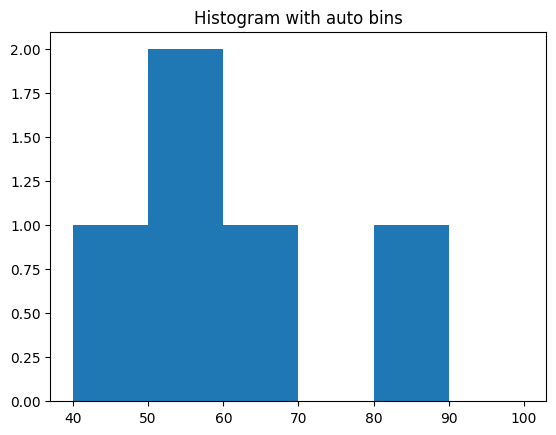

In [28]:
import matplotlib.pyplot as plt

##plot histogram where you can specify the number of bins or the bin edges
#plt.hist(testout['WEIGHT'],bins=5)
plt.hist(testout['WEIGHT'],bins=[40,50,60,70,80,90,100])
plt.title('Histogram with auto bins')
plt.show()

### Transpose the data

Use **melt** to tranpose the data

Date column will become the first column, column name will become 'id' and column values will be called 'return'

In [29]:
##################Read the data and transpose for easier analysis################
sample=pd.read_excel('./note1data.xlsx', sheet_name="SAMPLE", header=0)
print(sample) #print the sample dataframe
print(sample.columns) # print the columns of the sample dataframe
print(os.getcwd()) #print out the current working directory

print(sample.iloc[0:4,0:3]) #print out first 4 rows and first 3 columns

         Date      MSFT       IBM       WMT     SP500    RmRf     SMB     HML  \
0    20010131  0.407781  0.317647  0.069176  0.039499  0.0313  0.0712 -0.0568   
1    20010228 -0.033777 -0.106875 -0.118134 -0.099263 -0.1005 -0.0120  0.1383   
2    20010330 -0.073093 -0.037237  0.009583 -0.070260 -0.0726  0.0055  0.0637   
3    20010430  0.238857  0.197130  0.024554  0.083832  0.0794  0.0033 -0.0438   
4    20010531  0.021107 -0.027792  0.000193  0.010576  0.0072  0.0300  0.0277   
..        ...       ...       ...       ...       ...     ...     ...     ...   
151  20130830  0.056219 -0.060603 -0.057608 -0.025714 -0.0269  0.0028 -0.0246   
152  20130930 -0.003593  0.015965  0.013428  0.037477  0.0376  0.0285 -0.0152   
153  20131031  0.063852 -0.032239  0.037723  0.039852  0.0417 -0.0153  0.0139   
154  20131129  0.084875  0.007924  0.055505  0.024946  0.0312  0.0131 -0.0038   
155  20131231 -0.018883  0.043911 -0.022837  0.026126  0.0281 -0.0044 -0.0017   

         RF  
0    0.0054  

In [30]:
#Use pd.melt to transform the dataframe from wide format to long format
sampletran=pd.melt(sample,id_vars=['Date'],var_name='id',value_name='return')
print(sampletran.columns)# Check how the columns are transformed
print(sampletran) #print the transformed dataframe
print(sampletran.head(10)) #print out the first 10 rows
print(sampletran.tail(8)) #print out the last 8 rows

Index(['Date', 'id', 'return'], dtype='object')
          Date    id    return
0     20010131  MSFT  0.407781
1     20010228  MSFT -0.033777
2     20010330  MSFT -0.073093
3     20010430  MSFT  0.238857
4     20010531  MSFT  0.021107
...        ...   ...       ...
1243  20130830    RF  0.000000
1244  20130930    RF  0.000000
1245  20131031    RF  0.000000
1246  20131129    RF  0.000000
1247  20131231    RF  0.000000

[1248 rows x 3 columns]
       Date    id    return
0  20010131  MSFT  0.407781
1  20010228  MSFT -0.033777
2  20010330  MSFT -0.073093
3  20010430  MSFT  0.238857
4  20010531  MSFT  0.021107
5  20010629  MSFT  0.055218
6  20010731  MSFT -0.093288
7  20010831  MSFT -0.138087
8  20010928  MSFT -0.103068
9  20011031  MSFT  0.136408
          Date  id  return
1240  20130531  RF     0.0
1241  20130628  RF     0.0
1242  20130731  RF     0.0
1243  20130830  RF     0.0
1244  20130930  RF     0.0
1245  20131031  RF     0.0
1246  20131129  RF     0.0
1247  20131231  RF     0.0


In [31]:
# To add a new worksheet to an existing excel file
# Create a Pandas Excel writer using Openpyxl as the engine.
import openpyxl
writer = pd.ExcelWriter('./note1_out.xlsx', engine='openpyxl', mode='a')

# Get the list of existing worksheets
print(writer.book.sheetnames)

# Write the DataFrame to the new worksheet
sampletran.to_excel(writer, sheet_name='sampletran', startrow=0, startcol=0, index=False)

# Save the changes to the Excel file
writer.close()

['TEST4']


# SQL

Let's import RData (data saved in R) to import Rdata

Install **pyreadr** using the following command if not installed yet

In [32]:
# !pip install pyreadr

In [33]:
import pyreadr #package used to read RData, data used in R

In [34]:
data1=pyreadr.read_r('.\\note1.RData') # Read the RData file
# The result is a dictionary with the dataframes as values
print(type(data1))
print(data1)

<class 'collections.OrderedDict'>
OrderedDict({'mdata':            date   id    return isign    year  month   day
0    2001-01-31  IBM  0.317647   POS  2001.0    1.0  31.0
1    2001-02-28  IBM -0.106875   NEG  2001.0    2.0  28.0
2    2001-03-30  IBM -0.037237   NEG  2001.0    3.0  30.0
3    2001-04-30  IBM  0.197130   POS  2001.0    4.0  30.0
4    2001-05-31  IBM -0.027792   NEG  2001.0    5.0  31.0
..          ...  ...       ...   ...     ...    ...   ...
463  2013-08-30  WMT -0.057608   NEG  2013.0    8.0  30.0
464  2013-09-30  WMT  0.013428   POS  2013.0    9.0  30.0
465  2013-10-31  WMT  0.037723   POS  2013.0   10.0  31.0
466  2013-11-29  WMT  0.055505   POS  2013.0   11.0  29.0
467  2013-12-31  WMT -0.022837   NEG  2013.0   12.0  31.0

[468 rows x 7 columns]})


In [35]:
# Check the keys of the dictionary to see the names of the dataframes
print(data1.keys())

odict_keys(['mdata'])


In [36]:
# Access the specific dataframe from the dictionary
# Here, 'mdata' is the name of the dataframe in the RData file
data2=data1['mdata']#mdata is the table in RData
print(type(data2)) #Check the type of the diciontary's values
print(data2.head()) # #print the first 5 rows of the dataframe

<class 'pandas.core.frame.DataFrame'>
         date   id    return isign    year  month   day
0  2001-01-31  IBM  0.317647   POS  2001.0    1.0  31.0
1  2001-02-28  IBM -0.106875   NEG  2001.0    2.0  28.0
2  2001-03-30  IBM -0.037237   NEG  2001.0    3.0  30.0
3  2001-04-30  IBM  0.197130   POS  2001.0    4.0  30.0
4  2001-05-31  IBM -0.027792   NEG  2001.0    5.0  31.0


In [37]:
print(data2.iloc[1:10,]) #check the first 10 rows of the dataframe
print(data2.columns)

         date   id    return isign    year  month   day
1  2001-02-28  IBM -0.106875   NEG  2001.0    2.0  28.0
2  2001-03-30  IBM -0.037237   NEG  2001.0    3.0  30.0
3  2001-04-30  IBM  0.197130   POS  2001.0    4.0  30.0
4  2001-05-31  IBM -0.027792   NEG  2001.0    5.0  31.0
5  2001-06-29  IBM  0.010733   POS  2001.0    6.0  29.0
6  2001-07-31  IBM -0.068938   NEG  2001.0    7.0  31.0
7  2001-08-31  IBM -0.048665   NEG  2001.0    8.0  31.0
8  2001-09-28  IBM -0.082341   NEG  2001.0    9.0  28.0
9  2001-10-31  IBM  0.178260   POS  2001.0   10.0  31.0
Index(['date', 'id', 'return', 'isign', 'year', 'month', 'day'], dtype='object')


### How to run SQL in Python

There are different ways to run SQL.  We will use pandasql that is convenient to run sql using pandas dataframes

Functions available in pandasql

    -AVG() – returns the average value of a group.
    -COUNT() – returns the number of rows that match a specified condition
    -MAX() – returns the maximum value in a group.
    -MIN() – returns the minimum value in a group
    -SUM() – returns the sum of values


https://community.alteryx.com/t5/Data-Science-Blog/pandasql-Make-python-speak-SQL/ba-p/138435

First install pandasql if not installed yet

In [38]:
# !pip install pandasql

In [39]:
# In the pandasql package, sqldf is a function that allows you to run SQL queries on pandas dataframes
# You can import it as follows
from pandasql import sqldf

In [40]:
#Define a query statement to be used inside the sqldf function

query1='''select a.id,avg(a.return) as mean, 
                 min(a.return) as minimum, max(a.return) as maximum, 
                 count(a.return) as number
             from data2 as a 
             group by a.id
             order by a.id'''

#### locals() vs. globals()

When you use sqldf(query statement, locals/globals), you have to specify
whether the variables are used locally or globally by specifying either locals() or globals() inside sqldf()

When pandasql needs to have access to other variables in your session/environment, you can pass locals() to pandasql when executing a SQL statement.

But if you're running a lot of queries requiring locals(), it might be a pain. 

In [41]:
# When locals() are specified, the variables are accessed from the local scope
# When globals() are specified, the variables are accessed from the global scope
df1=sqldf(query1,locals())
print(df1)

     id      mean   minimum   maximum  number
0   IBM  0.008839 -0.226453  0.353799     156
1  MSFT  0.008518 -0.163357  0.407781     156
2   WMT  0.005168 -0.159472  0.145492     156


### Alternatively, you can define a function including globals()

To avoid passing locals all the time, you can add this helper function to your script to set globals() like so:

Define your custom function 

In [42]:
# you can define a function including globals()
# To avoid passing locals all the time, you can add this helper function to your script to
def pysqldf(q):
 return sqldf(q, globals())

If you use locals() above instead of globals(), you will get error message since it does not recognize data2 that is defined outside function.

In [43]:
# You can use your defined function to run the SQL query that was defined earlier
meansql=pysqldf(query1)
print(df1) #Query output using sqldf(locals())
print(meansql) #Query output using pysqldf(globals())
# The output should be the same as df1

     id      mean   minimum   maximum  number
0   IBM  0.008839 -0.226453  0.353799     156
1  MSFT  0.008518 -0.163357  0.407781     156
2   WMT  0.005168 -0.159472  0.145492     156
     id      mean   minimum   maximum  number
0   IBM  0.008839 -0.226453  0.353799     156
1  MSFT  0.008518 -0.163357  0.407781     156
2   WMT  0.005168 -0.159472  0.145492     156


In [44]:
#You can defined a query statement inside the pysqldf function
pysqldf('''select a.id,avg(a.return) as mean, 
                 min(a.return) as minimum, max(a.return) as maximum, 
                 count(a.return) as number
             from data2 as a 
             group by a.id
             order by a.id''')

,id,mean,minimum,maximum,number
0,IBM,0.008839,-0.226453,0.353799,156
1,MSFT,0.008518,-0.163357,0.407781,156
2,WMT,0.005168,-0.159472,0.145492,156


In [45]:
#You can also store the output of the query directly into a dataframe.
mdata1=pysqldf('''select a.id,a.date,a.return from data2 as a order by a.id,a.date''')
print(data2.columns)
print(mdata1)

Index(['date', 'id', 'return', 'isign', 'year', 'month', 'day'], dtype='object')
      id        date    return
0    IBM  2001-01-31  0.317647
1    IBM  2001-02-28 -0.106875
2    IBM  2001-03-30 -0.037237
3    IBM  2001-04-30  0.197130
4    IBM  2001-05-31 -0.027792
..   ...         ...       ...
463  WMT  2013-08-30 -0.057608
464  WMT  2013-09-30  0.013428
465  WMT  2013-10-31  0.037723
466  WMT  2013-11-29  0.055505
467  WMT  2013-12-31 -0.022837

[468 rows x 3 columns]


### Calculate group means

In [46]:
# Calculate group means using groupby and agg functions
# You can use the groupby function to group the data by 'id' and then calculate
grouped=data2.groupby('id',observed=False)['return']#observed=False means that even the ones with ID caltegory missing will be included
print(grouped.agg(['mean','min','max','std','count']))

          mean       min       max       std  count
id                                                 
IBM   0.008839 -0.226453  0.353799  0.073673    156
MSFT  0.008518 -0.163357  0.407781  0.079890    156
WMT   0.005168 -0.159472  0.145492  0.051059    156


In [47]:
#For a more detailed description of the grouped data, you can use the describe() function
# This will give you a summary of the statistics for each group
print(data2.groupby('id',observed=False)['return'].describe())

      count      mean       std       min       25%       50%       75%  \
id                                                                        
IBM   156.0  0.008839  0.073673 -0.226453 -0.025425  0.008467  0.047004   
MSFT  156.0  0.008518  0.079890 -0.163357 -0.039620  0.012113  0.052840   
WMT   156.0  0.005168  0.051059 -0.159472 -0.027755  0.007920  0.038397   

           max  
id              
IBM   0.353799  
MSFT  0.407781  
WMT   0.145492  


In [48]:
#Alternatively, you can calculate the mean, min, max, std, and count for each group using the following commands

print('mean:  ', data2.groupby('id',observed=False)['return'].mean())
print('min:  ', data2.groupby('id',observed=False)['return'].min())
print('max:  ', data2.groupby('id',observed=False)['return'].max())
print('std:  ', data2.groupby('id',observed=False)['return'].std())
print('count:  ', data2.groupby('id',observed=False)['return'].count())
print('count-alt:  ', data2[(data2.id !=0)].groupby('id',observed=False)['return'].count()) #count only non-zeros

###compare the results with the meansql
print(meansql)
#######################################################################################

mean:   id
IBM     0.008839
MSFT    0.008518
WMT     0.005168
Name: return, dtype: float64
min:   id
IBM    -0.226453
MSFT   -0.163357
WMT    -0.159472
Name: return, dtype: float64
max:   id
IBM     0.353799
MSFT    0.407781
WMT     0.145492
Name: return, dtype: float64
std:   id
IBM     0.073673
MSFT    0.079890
WMT     0.051059
Name: return, dtype: float64
count:   id
IBM     156
MSFT    156
WMT     156
Name: return, dtype: int64
count-alt:   id
IBM     156
MSFT    156
WMT     156
Name: return, dtype: int64
     id      mean   minimum   maximum  number
0   IBM  0.008839 -0.226453  0.353799     156
1  MSFT  0.008518 -0.163357  0.407781     156
2   WMT  0.005168 -0.159472  0.145492     156
